<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1003_CH08_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER 08 : 텍스트 분석

* NLP : 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술이 발전
  * 언어를 해석하기 위한 기계 번역, 자동으로 질문을 해석하고 답을 해주는 질의응답 시스템 
* Text Mining : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전
  * 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 드으이 분석 작업 주로 수행
  * 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭/ 지도학습 적용
  * 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법 총칭 / 지도학습 & 비지도학습
  * 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
  * 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법

---
## 1. 텍스트 분석 이해

### 1) 텍스트 분석 수행 프로세스

1. **텍스트 사전 준비작업** : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 적업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업 수행
2. **피처 벡터화 추출** : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당
3. **ML 모델 수립 및 학습/예측/평가** : 피처 벡터화된 데이터 세트에 ML모델을 적용해 학습/예측 및 평가를 수행

### 2) 파이썬 기반의 NLP, 텍스트 분석 패키지

1. NLTK(Natural Language Toolkit for Python) : 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 모든 영역 커버
2. Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지
3. SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

---
## 2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

1. **클렌징** : 텍스트 분석에 오히려 방해가 되는 불필요한 문자, 기호 드을 사전에 제거하는 작업
2. **토큰화** : 문장을 분리하는 문장 토큰화 / 문장에서 단어를 토큰으로 분리하는 단어 토큰화 
3. **필터링/ 스톱 워드 제거 / 철자 수정** 
4. **Stemming**
5. **Lemmatization**

### 1) 텍스트 토큰화

* 문장 토근화

: 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere tis all aroung us, here even in this room. \
You can see it out your window or on your television. \
You fell it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text = text_sample)

print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere tis all aroung us, here even in this room.', 'You can see it out your window or on your television.', 'You fell it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* 단어 토큰화

: 문장을 단어로 토큰화 하는 것으로 기본적으로 공백, 콤마, 마침표, 개행 문자등으로 단어 분리

In [3]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수
def tokenize_text(text) :
  #문장별로
  senteces = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentece) for sentece in sentences]
  return word_tokens
#여러 문장에 대해 문장별 단어 토큰화
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'tis', 'all', 'aroung', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'fell', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 2) 스톱 워드 제거

* 스톱 워트 : 분석에 큰 의미가 없는 단어 지칭
  * 영어에서의 is, the, a ,will

In [5]:
#NLTK의 stopwords 목록 내려 받기
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
print('영어 stop words 개수: ', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [9]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for sentence in word_tokens :
  filtered_words = []
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드 제거
  for word in sentence :
    #소문자로 변환
    word = word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords :
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'tis', 'aroung', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['fell', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### 3) Stemming 과 Lemmatization
: 문법적으로 또는 의미적으로 변화하는 단어의 원형 찾는 것

* **Lemmatization**이 **Stemming**보다 정교하며 의미론적인 기반에서 단어의 원형 찾음

In [11]:
from  nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [17]:
from nltk.stem import WordNetLemmatizer

nltk.download('all')

lemma = WordNetLemmatizer()

# 동사: v, 형용사: a
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

amuse amuse amuse
happy happy
fancy fancy


---
## 3. Bag of Words - BOW

: 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

* 다음 2개의 문장을 Bag of words의 단어 수 기반으로 피처 추출
```
문장1: 'My wife likes to watch baseball games and my daughter likes to watch baseball games too'
문장2 : 'My wife likes to play baseball'
```

1. 문장 1과 문장2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열한 뒤 각 단어에 고유의 인덱스를 부여

* 중복 단어 : 'My','wife','likes','to','baseball'.
* 'and' : 0 / 'baseball' : 1 / 'daughter' : 2 / 'games' : 3 / ...

2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재

* BOW의 단점 
1. 문맥 의미 반영 부족 
2. 희소 행렬 문제 

### 1) BOW 피처 벡터화

* **피처 벡터화** : 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 피처에 값으로 부여해 각 문서를 이 단어 피러의 발생 빈도 값으로 구성된 벡터로 만드는 기법

* **BOW 모델**에서의 피처 벡터화 : 모든 문서에서 모든 단어를 칼럼 형태로 나영하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
  * 카운트 기반의 벡터화 : 카운트 값이 높을수록 중요단어로 인식
  * TF-IDF 기반의 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식

  $$TFIDF_i = TF_i * log{N \over DFi}$$
  * $TF_i$ : 개별 문서에서의 단어 i 빈도
  * $DF_i$ : 단어 i를 가지고 있는 문서 개수
  * $N$ : 전체 문서 개수

### 2) 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

1. 카운트 기반의 벡터화를 구현한 클래스
2. 단지 피처 벡터화만 수행하지는 않으며 소문자 일괄변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행
3. 입력 파라미터

* `max_df` : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처 제외
* `min_df` : 전체 문서에 걸쳐 너무 낮은 빈도수를 가지는 단어 피처 제외
* `stop_words` : 'english'로 설정하면 영어의 스톱워드로 지정된 단어 제외
* `n_gram_range` : 단어 순서를 어느정도 보강하기 위한 범위지정 (범위 최솟값, 범위 최댓값)
* `analyzer` : 피처 추출을 수행한 단위 지정
* `token_pattern` : 토큰화를 수행하는 정규 표현식 패턴을 지정
* `tokenizer` : 토큰화를 별도의 커스텀 함수로 이용시 적용


### 3) BOW 벡터화를 위한 희소 행렬

* 희소 행렬 : 대규모 행렬의 대부분의 값을 0이 차지하는 행렬
* 모든 문서의 단어를 추출해 피처로 벡터화한느 방법은 필연적으로 **많은 칼럼**을 만들 수 밖에 없음 -> `BOW형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬`

### 4) 희소 행렬 - COO 형식

* COO : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [19]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])


In [20]:
#COO형식의 희소행렬로 변화

from scipy import sparse

data = np.array([3,1,2])
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))

In [21]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 4) 희소 행렬 - CSR 형식

* CSR : COO형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점 해결

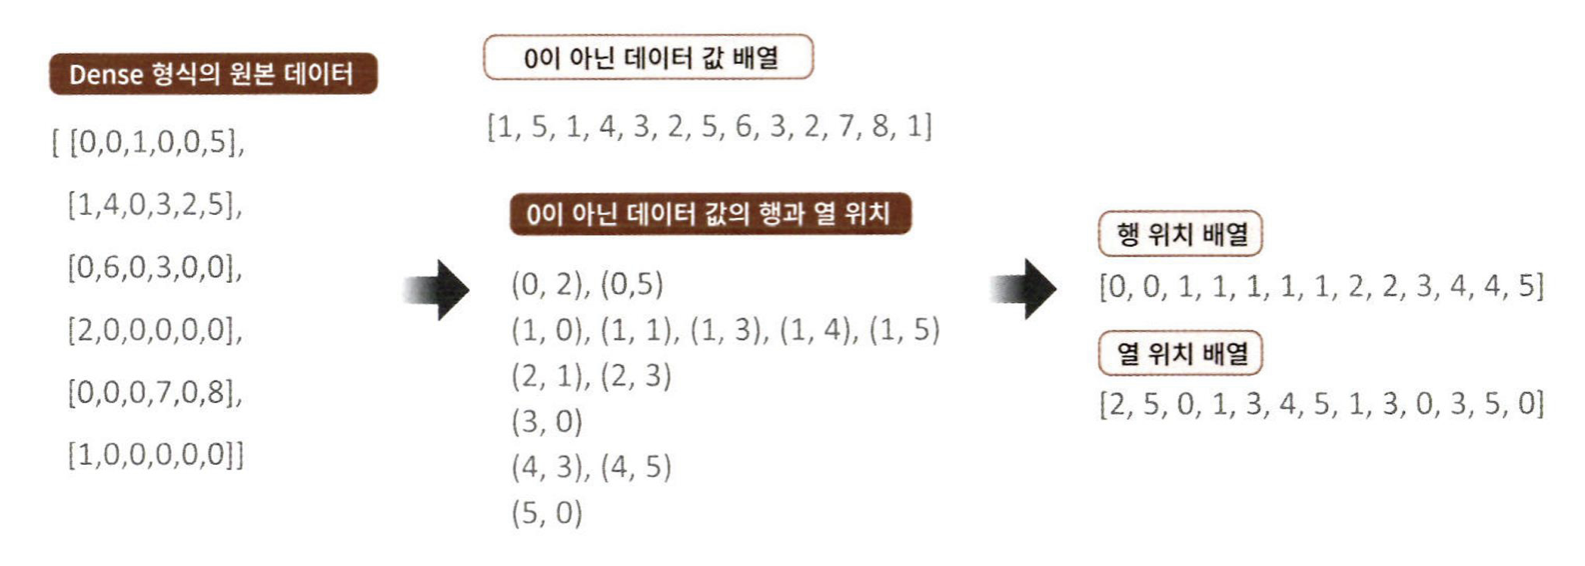

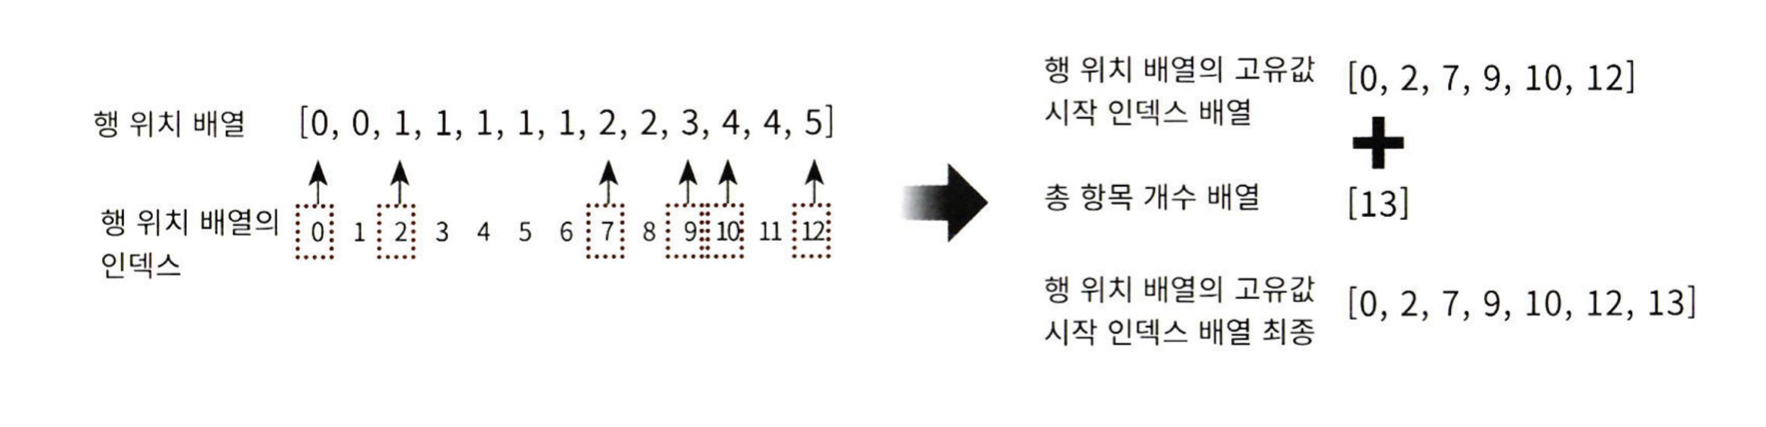

In [25]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]]
                   )

#0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 설정
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#coo형식으로 변환
sparse_coo = sparse.coo_matrix((data2,(row_pos,col_pos)))

#행위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2,col_pos,row_pos_ind))



print('COO 변환된 데이터가 제대로 되었는지 다시 Dense 로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense 로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
